In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

In [2]:
gps_data = pd.read_csv('../data/gps.csv')
gps_data.head(2)

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395


In [3]:
gps_data.shape

(166593, 13)

In [4]:
gps_data.columns

Index(['Id', 'Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date',
       'DateTime', 'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime',
       'RepId'],
      dtype='object')

In [5]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166593 entries, 0 to 166592
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          166593 non-null  int64  
 1   Longitude   166593 non-null  float64
 2   Latitude    166593 non-null  float64
 3   Accuracy    166593 non-null  float64
 4   TimeStamp   166593 non-null  int64  
 5   Date        166593 non-null  object 
 6   DateTime    166593 non-null  object 
 7   IsGPSOn     166593 non-null  bool   
 8   BatLevel    166593 non-null  int64  
 9   Provider    166593 non-null  object 
 10  Bearing     166593 non-null  float64
 11  DeviceTime  166593 non-null  object 
 12  RepId       166593 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 15.4+ MB


In [6]:
gps_data.describe()

,Id,Longitude,Latitude,Accuracy,TimeStamp,BatLevel,Bearing,RepId
count,1.665930e+05,166593.000000,166593.000000,166593.000000,1.665930e+05,166593.000000,166593.000000,166593.0
mean,8.852408e+08,80.581402,7.189027,3.297644,1.695712e+12,69.535365,161.092791,395.0
std,1.072665e+06,0.013504,0.019379,38.099437,1.290286e+07,25.332350,113.484053,0.0
min,8.838740e+08,80.555760,7.157190,0.900000,1.695694e+12,0.000000,0.000000,395.0
25%,8.842829e+08,80.574910,7.172470,1.800000,1.695701e+12,55.000000,52.900000,395.0
50%,8.847399e+08,80.581980,7.185450,2.100000,1.695708e+12,79.000000,162.770000,395.0
75%,8.863998e+08,80.592810,7.206560,2.700000,1.695725e+12,90.000000,258.850000,395.0
max,8.868425e+08,80.603730,7.224640,2099.999000,1.695733e+12,99.000000,359.980000,395.0


In [7]:
gps_data['RepId'].unique()

array([395])

In [8]:
def date_time_formating(series):
    return pd.to_datetime(series, format='%d/%m/%Y %I:%M:%S %p')

gps_data['Date'] = date_time_formating(gps_data['Date'])
gps_data['DateTime'] = date_time_formating(gps_data['DateTime'])
gps_data['DeviceTime'] = date_time_formating(gps_data['DeviceTime'])

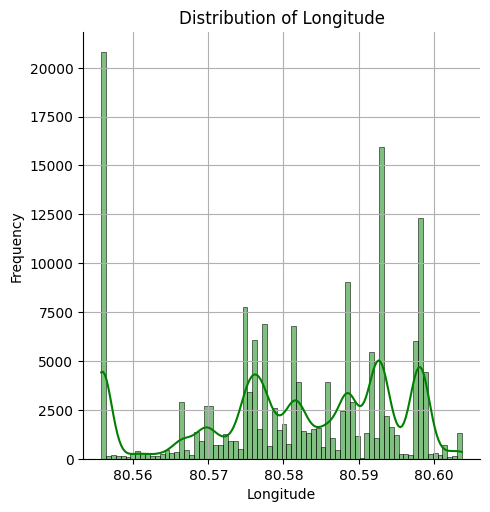

In [9]:
sns.displot(gps_data['Longitude'], kde=True, color='green')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude')
plt.grid(True)
plt.show()

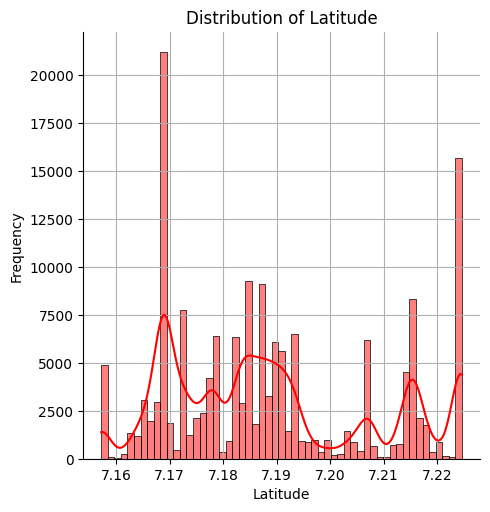

In [10]:
sns.displot(gps_data['Latitude'], kde=True, color='r')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude')
plt.grid(True)
plt.show()

In [11]:
gps_data['DeviceHour'] = gps_data['DeviceTime'].dt.hour

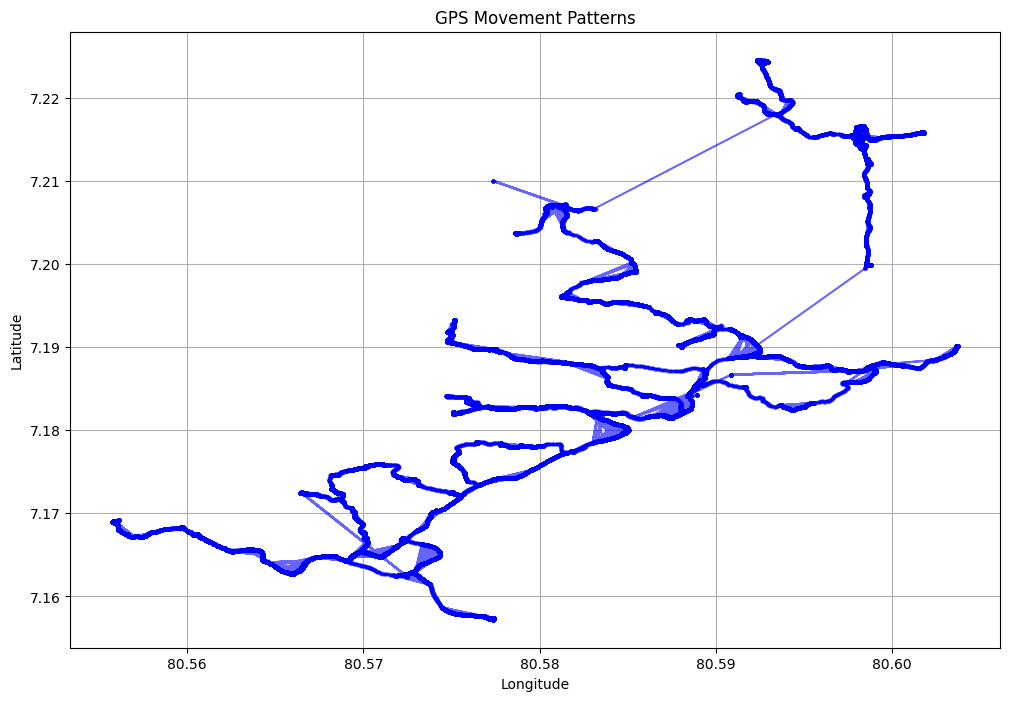

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

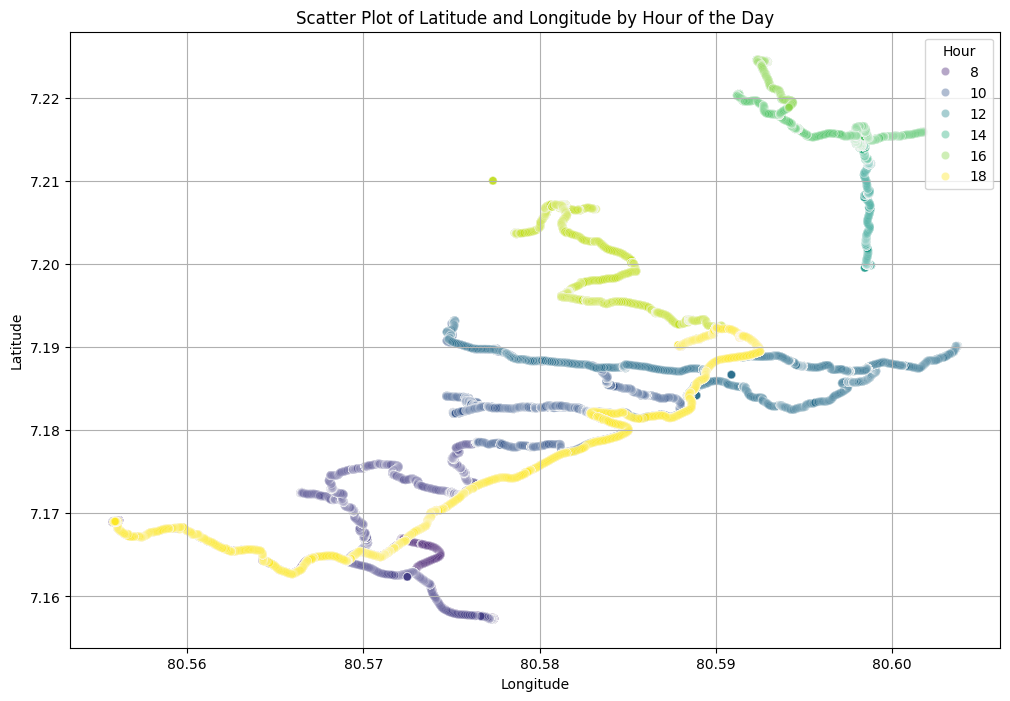

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gps_data, x='Longitude', y='Latitude', hue='DeviceHour', 
                palette='viridis',marker='o', alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude by Hour of the Day')
plt.legend(title='Hour')
plt.grid(True)
plt.show()

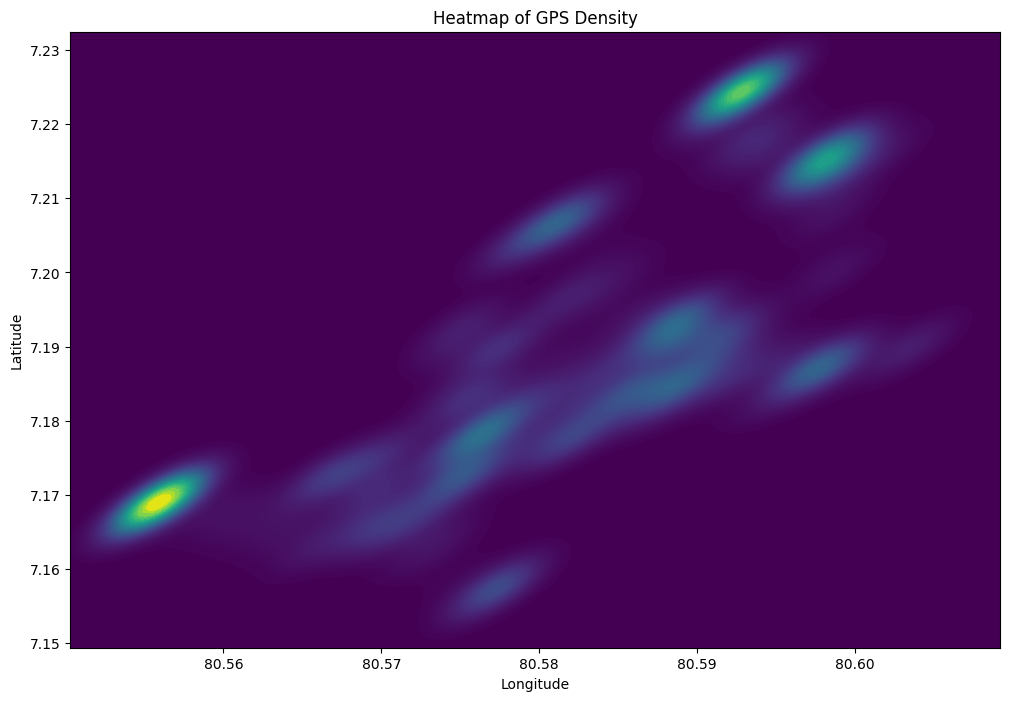

In [32]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=gps_data, x='Longitude', y='Latitude', cmap='viridis', fill=True, thresh=0, levels=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of GPS Density')
plt.show()